# XGBoost

## Importar las librerías

In [1]:
import pandas as pd

## Importar el conjunto de datos

In [2]:
datos = pd.read_csv('Datos_Clasificados.csv')
X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values

## División del conjunto de datos en un subconjunto para entrenamiento y otro para pruebas

In [3]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Obtener la Matriz de Confusión

In [4]:
from xgboost import XGBClassifier
clasificador = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.5)
clasificador.fit(X_entreno, y_entreno)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_predicciones = clasificador.predict(X_prueba)
mat_conf = confusion_matrix(y_prueba, y_predicciones)
print(mat_conf)
accuracy_score(y_prueba, y_predicciones)

[[ 79   7]
 [  5 109]]


0.94

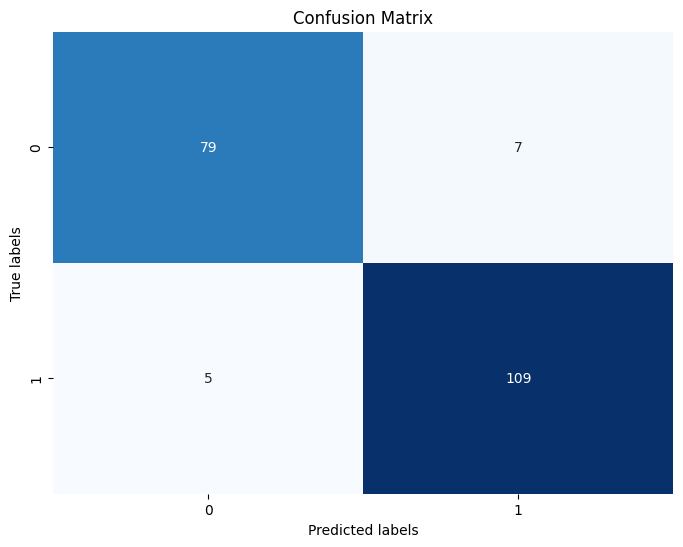

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()